## Transfer Learning Inception V3 using Keras

Please download the dataset from the below url

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [5]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [6]:
import os
import zipfile
from glob import glob

# Define the path to the zip file and the extraction path
zip_file_name = '/content/Cotton Disease.zip'  # Verify this path is correct
extract_path = '/content/Cotton Disease'

# Check if the file exists
if not os.path.exists(zip_file_name):
    print(f"Error: The file '{zip_file_name}' does not exist.")
else:
    # Check the magic number
    with open(zip_file_name, 'rb') as f:
        magic_number = f.read(4)
        if magic_number == b'\x50\x4b\x03\x04':  # Check for zip file signature
            print("The file appears to be a valid zip file.")

            # Proceed with unzipping
            try:
                with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
                    zip_ref.extractall(extract_path)
                print(f"Unzipped the file to {extract_path}")

                # Define the path to the training directory
                train_path = os.path.join(extract_path, 'Cotton Disease/train')

                # Get the list of folders (classes) in the training directory
                folders = glob(os.path.join(train_path, '*'))

                # Get the number of classes
                num_classes = len(folders)
                print(f"Number of classes: {num_classes}")

            except zipfile.BadZipFile:
                print("The file is likely corrupted and cannot be unzipped.")
        else:
            print("The file is not a valid zip file. Please check the file and try again.")

The file appears to be a valid zip file.
Unzipped the file to /content/Cotton Disease
Number of classes: 4


In [7]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/Cotton Disease/Cotton Disease/train'
valid_path = '/content/Cotton Disease/Cotton Disease/test'


In [8]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [9]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [10]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [11]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [12]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [13]:

# view the structure of the model
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 111, 111, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 111, 111, 32)   │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 111, 111, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 109, 109, 32)   │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 109, 109, 32)   │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 109, 109, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 109, 109, 64)   │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 109, 109, 64)   │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 109, 109, 64)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 54, 54, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 54, 54, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 54, 54, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 54, 54, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 52, 52, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 52, 52, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

In [14]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [15]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/Cotton Disease/Cotton Disease/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [17]:
test_set = test_datagen.flow_from_directory('/content/Cotton Disease/Cotton Disease/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 131 images belonging to 4 classes.


In [18]:
import zipfile
import os
from glob import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import load_model

# Define the path to the zip file and the extraction path
zip_file_name = '/content/Cotton Disease.zip'
extract_path = '/content/Cotton Disease'

# Check if the file exists
if not os.path.exists(zip_file_name):
    print(f"Error: The file '{zip_file_name}' does not exist.")
else:
    # Check the magic number
    with open(zip_file_name, 'rb') as f:
        magic_number = f.read(4)
        if magic_number == b'\x50\x4b\x03\x04':
            print("The file appears to be a valid zip file.")

            # Proceed with unzipping
            with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
                zip_ref.extractall(extract_path)
            print(f"Unzipped the file to {extract_path}")

            # Define the path to the training directory
            train_path = os.path.join(extract_path, 'Cotton Disease/train')
            test_path = os.path.join(extract_path, 'Cotton Disease/test')

            # Get the list of folders (classes) in the training directory
            folders = glob(os.path.join(train_path, '*'))

            # Get the number of classes
            num_classes = len(folders)
            print(f"Number of classes: {num_classes}")

            # Data augmentation
            train_datagen = ImageDataGenerator(
                rescale=1./255,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True
            )

            test_datagen = ImageDataGenerator(rescale=1./255)

            training_set = train_datagen.flow_from_directory(
                train_path,
                target_size=(224, 224),
                batch_size=32,
                class_mode='categorical'
            )

            test_set = test_datagen.flow_from_directory(
                test_path,
                target_size=(224, 224),
                batch_size=32,
                class_mode='categorical'
            )

            # Load or define a CNN model
            # If you want to load a model:
            # model = load_model('/content/model_vgg16.h5')

            # If you want to define a new model:
            model = Sequential([
                Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
                MaxPooling2D(pool_size=(2, 2)),
                Dropout(0.25),
                Conv2D(64, (3, 3), activation='relu'),
                MaxPooling2D(pool_size=(2, 2)),
                Dropout(0.25),
                Flatten(),
                Dense(128, activation='relu'),
                Dropout(0.5),
                Dense(num_classes, activation='softmax')
            ])

            model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

            # Calculate steps_per_epoch and validation_steps
            steps_per_epoch = training_set.samples // training_set.batch_size
            validation_steps = test_set.samples // test_set.batch_size

            # Fit the model using the fit method
            r = model.fit(
                training_set,
                validation_data=test_set,
                epochs=20,
                steps_per_epoch=steps_per_epoch,
                validation_steps=validation_steps
            )

            # Print the summary of the model
            model.summary()
        else:
            print("The file is not a valid zip file. Please check the file and try again.")

The file appears to be a valid zip file.
Unzipped the file to /content/Cotton Disease
Number of classes: 4
Found 1951 images belonging to 4 classes.
Found 131 images belonging to 4 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


60/60 ━━━━━━━━━━━━━━━━━━━━ 242s 4s/step - accuracy: 0.3378 - loss: 5.0845 - val_accuracy: 0.3906 - val_loss: 1.2794
Epoch 2/20
 1/60 ━━━━━━━━━━━━━━━━━━━━ 3:53 4s/step - accuracy: 0.3750 - loss: 1.1916

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.3750 - loss: 1.1916 - val_accuracy: 0.6667 - val_loss: 1.2347
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 242s 4s/step - accuracy: 0.5063 - loss: 1.1307 - val_accuracy: 0.4609 - val_loss: 1.2134
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5312 - loss: 1.0815 - val_accuracy: 0.3333 - val_loss: 1.2266
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 267s 4s/step - accuracy: 0.5707 - loss: 1.0542 - val_accuracy: 0.5234 - val_loss: 1.1246
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5000 - loss: 1.1145 - val_accuracy: 1.0000 - val_loss: 0.8290
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 253s 4s/step - accuracy: 0.5848 - loss: 0.9946 - val_accuracy: 0.6016 - val_loss: 1.0702
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6562 - loss: 0.9689 - val_accuracy: 0.6667 - val_loss: 1.0445
Epoch 9/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 233s 4s/step - accuracy: 0.6675 - loss: 0.8526 - val_accuracy: 0.6172 - val_loss: 1.080

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_94 (Conv2D)                   │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_95 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │      23,888,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,723,726 (273.60 MB)

 Trainable params: 23,907,908 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 47,815,818 (182.40 MB)

In [19]:
import matplotlib.pyplot as plt

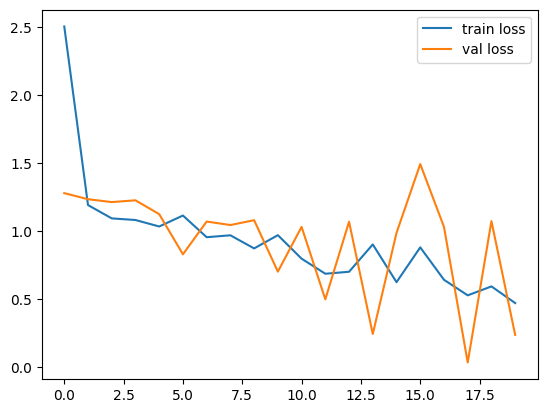

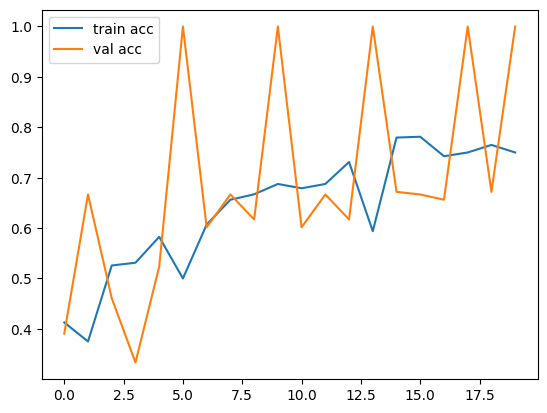

<Figure size 640x480 with 0 Axes>

In [20]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [21]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [22]:

y_pred = model.predict(test_set)


5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 827ms/step


In [23]:
y_pred

array([[2.63679102e-02, 1.02101367e-04, 9.73497450e-01, 3.25115398e-05],
       [9.97731030e-01, 8.12776037e-04, 1.45609572e-03, 1.50501734e-07],
       [6.17206953e-02, 5.51900208e-01, 1.32417679e-01, 2.53961295e-01],
       [8.38397443e-02, 3.81970525e-01, 7.81928301e-02, 4.55996901e-01],
       [3.26648474e-01, 1.01789467e-01, 5.27898610e-01, 4.36634459e-02],
       [4.62813303e-02, 5.52224159e-01, 9.39838737e-02, 3.07510614e-01],
       [9.11734460e-05, 9.94122565e-01, 1.11732707e-05, 5.77521278e-03],
       [1.47264637e-03, 9.36206281e-01, 1.60905928e-03, 6.07119910e-02],
       [1.63660333e-01, 6.31049573e-01, 2.00146377e-01, 5.14356466e-03],
       [7.62929246e-02, 1.02425758e-02, 7.73380339e-01, 1.40084073e-01],
       [7.28552043e-01, 1.74276546e-01, 6.96697161e-02, 2.75016911e-02],
       [4.84304368e-01, 3.41588736e-01, 8.58725533e-02, 8.82343724e-02],
       [1.99875832e-01, 5.19455485e-02, 5.34026563e-01, 2.14152008e-01],
       [8.43303744e-03, 7.10529923e-01, 1.84229203e

In [24]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [25]:
y_pred

array([2, 0, 1, 3, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 2, 2, 0, 0, 2, 1, 3,
       0, 1, 2, 1, 0, 2, 0, 0, 2, 3, 1, 1, 1, 2, 0, 0, 0, 1, 1, 3, 1, 1,
       0, 1, 1, 3, 2, 0, 1, 2, 2, 0, 1, 2, 0, 3, 1, 2, 1, 0, 3, 0, 3, 0,
       1, 1, 2, 1, 0, 0, 1, 3, 0, 3, 1, 3, 2, 3, 0, 1, 1, 1, 1, 1, 3, 3,
       1, 2, 2, 2, 0, 3, 0, 1, 1, 2, 2, 3, 1, 3, 3, 2, 2, 1, 2, 3, 3, 3,
       0, 1, 1, 0, 0, 2, 2, 1, 3, 1, 2, 3, 2, 1, 1, 0, 1, 3, 0, 0, 1])

In [69]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [70]:
model=load_model('/content/model_inception.h5')

In [71]:
img=image.load_img('/content/Cotton Disease/Cotton Disease/test/fresh cotton leaf/d (122)_iaip.jpg',target_size=(224,224))



In [72]:
x=image.img_to_array(img)
x

array([[[148., 187., 130.],
        [147., 187., 125.],
        [166., 206., 143.],
        ...,
        [ 55.,  49.,  35.],
        [ 52.,  46.,  32.],
        [ 53.,  47.,  33.]],

       [[146., 185., 128.],
        [145., 185., 123.],
        [165., 205., 142.],
        ...,
        [ 62.,  56.,  42.],
        [ 58.,  52.,  38.],
        [ 68.,  62.,  48.]],

       [[149., 188., 131.],
        [148., 188., 126.],
        [168., 208., 145.],
        ...,
        [ 67.,  61.,  47.],
        [ 63.,  57.,  43.],
        [ 61.,  55.,  41.]],

       ...,

       [[155., 183., 108.],
        [161., 189., 112.],
        [174., 203., 121.],
        ...,
        [114., 160.,  88.],
        [116., 162.,  90.],
        [122., 168.,  96.]],

       [[154., 183., 101.],
        [149., 178.,  96.],
        [161., 190., 108.],
        ...,
        [110., 155.,  90.],
        [121., 167.,  95.],
        [122., 168.,  96.]],

       [[157., 186., 104.],
        [134., 163.,  81.],
        [148., 1

In [73]:
x.shape

(224, 224, 3)

In [74]:
x=x/255

In [75]:
from keras.applications.inception_v3 import preprocess_input

In [64]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
Predicted label: class3


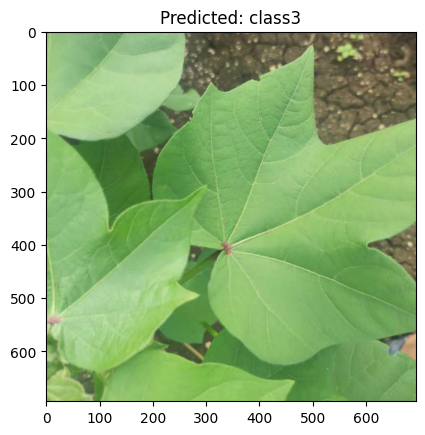

In [78]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
import matplotlib.pyplot as plt

# Load the saved model
model = load_model('/content/model_inception.h5')

# Load and preprocess the image
img_path = '/content/Cotton Disease/Cotton Disease/test/fresh cotton leaf/d (122)_iaip.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Predict the class
predictions = model.predict(x)

# Get the predicted class index
predicted_class_index = np.argmax(predictions)

# Assuming you have a list of class labels
class_labels = ['class1', 'class2', 'class3', 'class4']  # Replace with your actual class labels
predicted_class_label = class_labels[predicted_class_index]

# Print the predicted label
print(f'Predicted label: {predicted_class_label}')

# Optionally, display the image with the predicted label
plt.imshow(image.load_img(img_path))
plt.title(f'Predicted: {predicted_class_label}')
plt.show()
